<a href="https://colab.research.google.com/github/jiansim03/Note/blob/main/03_%EB%94%A5%EB%9F%AC%EB%8B%9D_%EA%B5%AC%EC%A1%B0%EC%99%80_%EB%AA%A8%EB%8D%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3-3. 딥러닝 모델
### Sequential API
- 모델이 순차적인 구조로 진행될 때 사용하는 가장 단순한 방법
- 다중입력, 출력이 존재하는 등의 복잡한 모델은 구성할 수 없음
### Functional API
- 모델 생성에 권장되는 방법
- 다중 입출력 다룰 수 있음
- 딥러닝 모델을 복잡, 유연하게 구성하는 것이 가능

### subclassing API
- 커스터마이징에 최적화된 방법으로 Model 클래스를 상속받아서 사용
- Functional API로도 구현할 수 없는 모델들도 구현 가능
- 단, 객체지향 프로그래밍에 익숙해야함

In [51]:
# 필요한 모듈을 임포트
from tensorflow.keras import layers, models, utils


## Sequential API
Sequential 객체 생성 후, add()를 이용하여 사용할 레이어 추가한다

In [52]:
model = models.Sequential()
model.add(layers.Input(shape=(28,28)))
model.add(layers.Dense(300, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 28, 300)           8700      
                                                                 
 dense_30 (Dense)            (None, 28, 10)            3010      
                                                                 
Total params: 11,710
Trainable params: 11,710
Non-trainable params: 0
_________________________________________________________________


**plot_model():** 딥러닝 모델 모습 시각화하는 함수

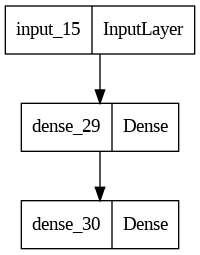

In [53]:
utils.plot_model(model)

In [54]:
from keras.api._v2.keras import activations
# sequential 인자에 한 번에 추가하기
model = models.Sequential([layers.Input(shape=(28,28), name='Input'),
                           layers.Dense(300,activation='relu', name='Dense1'),
                           layers.Dense(300,activation='relu', name='Dense2'),
                           layers.Dense(10,activation='softmax', name='Output')
                           ])
model.summary()


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense1 (Dense)              (None, 28, 300)           8700      
                                                                 
 Dense2 (Dense)              (None, 28, 300)           90300     
                                                                 
 Output (Dense)              (None, 28, 10)            3010      
                                                                 
Total params: 102,010
Trainable params: 102,010
Non-trainable params: 0
_________________________________________________________________


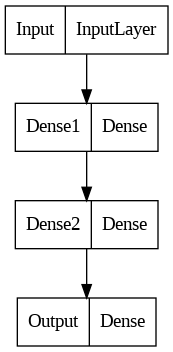

In [55]:
utils.plot_model(model)

## Functional API

In [56]:
inputs = layers.Input(shape=(28,28,1))
x = layers.Flatten(input_shape=(28, 28, 1))(inputs)
x = layers.Dense(300, activation='relu')(x)
x = layers.Dense(100, activation='relu')(x)
x = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=inputs, outputs=x)
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 300)               235500    
                                                                 
 dense_32 (Dense)            (None, 100)               30100     
                                                                 
 dense_33 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


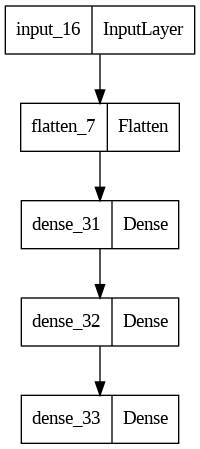

In [57]:
# 모델을 시각화 해보자
utils.plot_model(model)

In [58]:
# Functional API에서는 Input 객체를 여러 레이어에서 사용하는 것도 가능하다
# concatenate() 이용해 Dense 레이어 결과와 Input 결합

inputs =  layers.Input(shape=(28,28))
hidden1 = layers.Dense(100, activation='relu')(inputs)
hidden2 = layers.Dense(30, activation='relu')(hidden1)
concat = layers.Concatenate()([inputs, hidden2]) # inputs과 hidden2를 결합
output = layers.Dense(1)(concat)

model = models.Model(inputs=[inputs], outputs=[output])
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_34 (Dense)               (None, 28, 100)      2900        ['input_17[0][0]']               
                                                                                                  
 dense_35 (Dense)               (None, 28, 30)       3030        ['dense_34[0][0]']               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 28, 58)       0           ['input_17[0][0]',               
                                                                  'dense_35[0][0]']         

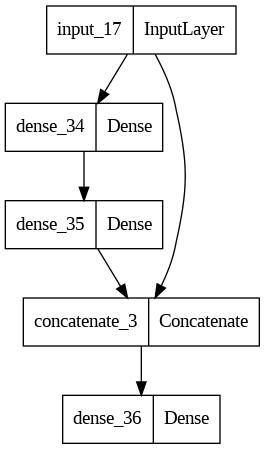

In [59]:
utils.plot_model(model)

In [62]:
# Functional API는 여러 Input 객체 사용하는 것도 가능

input_1 = layers.Input(shape=(10,10), name='Input_1') # 라이브러리가 아니라 모듈명을 입력해야한다(keras X, layers O)
input_2 = layers.Input(shape=(10,28), name='Input_2')

hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='output')(concat)

model = models.Model(inputs=[input_1,input_2], outputs = [output])
model.summary()

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input_2 (InputLayer)           [(None, 10, 28)]     0           []                               
                                                                                                  
 dense_39 (Dense)               (None, 10, 100)      2900        ['Input_2[0][0]']                
                                                                                                  
 Input_1 (InputLayer)           [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_40 (Dense)               (None, 10, 10)       1010        ['dense_39[0][0]']               
                                                                                            

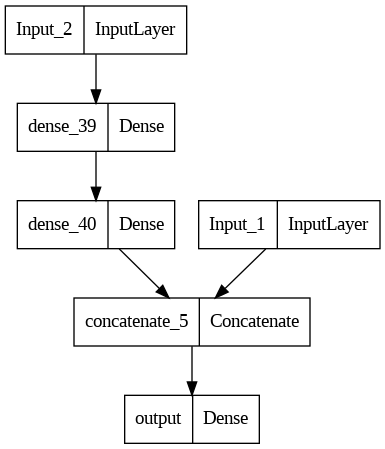

In [63]:
utils.plot_model(model)

In [64]:
# Functional API는 결과를 여러개로 나눠서 사용하는 것도 가능하다
input_ = layers.Input(shape=(10,10), name='input_')
hidden1 = layers.Dense(100, activation='relu')(input_)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
output = layers.Dense(1, activation='sigmoid', name='main_output')(hidden2)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

model = models.Model(inputs=[input_], outputs=[output, sub_out])
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_41 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_42 (Dense)               (None, 10, 10)       1010        ['dense_41[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_42[0][0]']               
                                                                                            

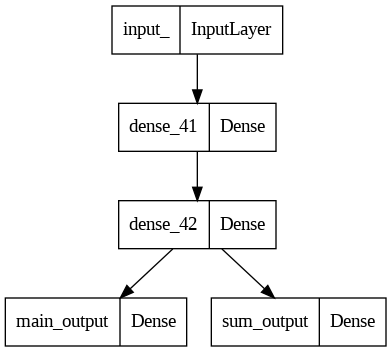

In [65]:
utils.plot_model(model)

### 다중 입출력 모델

In [70]:
input_1 = layers.Input(shape=(10,10), name='input_1')
input_2 = layers.Input(shape=(10,28), name='input_2')
hidden1 = layers.Dense(100, activation='relu')(input_2)
hidden2 = layers.Dense(10, activation='relu')(hidden1)
concat = layers.Concatenate()([input_1, hidden2])
output = layers.Dense(1, activation='sigmoid', name='main_output')(concat)
sub_out = layers.Dense(1, name='sum_output')(hidden2)

sub_out = models.Model(inputs=[input_1, input_2], outputs=[output, sub_out])
model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ (InputLayer)            [(None, 10, 10)]     0           []                               
                                                                                                  
 dense_41 (Dense)               (None, 10, 100)      1100        ['input_[0][0]']                 
                                                                                                  
 dense_42 (Dense)               (None, 10, 10)       1010        ['dense_41[0][0]']               
                                                                                                  
 main_output (Dense)            (None, 10, 1)        11          ['dense_42[0][0]']               
                                                                                            

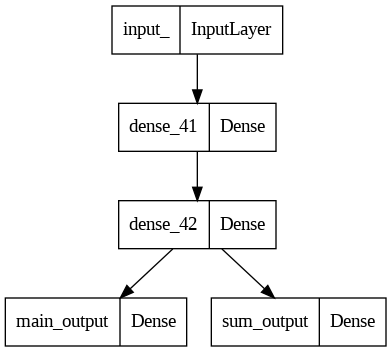

In [71]:
utils.plot_model(model)

## Subclassing API
- Model 클래스를 상속받아서 사용한다
- 기능
  - fit(): 모델학습  
  - evaluate(): 모델 평가
  - predict(): 모델 예측
  - save(): 모델 저장
  - load(): 모델 불러오기
  - call(): 메소드 안에서 원하는 계산 가능

In [74]:
class MyModel(models.Model):
  # 초기화 메서드
  def __init__(self, units=30, activation='relu', **kwargs):
    super(MyModel, self).__init__(**kwargs)
    self.dense_layer1 = layers.Dense(300, activation=activation)
    self.dense_layer2 = layers.Dense(100, activation=activation)
    self.dense_layer3 = layers.Dense(units, activation=activation)
    self.output_layer = layers.Dense(10, actvation='softmax')
  # 계산하는 메서드
  def call(self, inputs):
    x = self.dense_layer1(inputs)
    x = self.dense_layer2(x)
    x = self.dense_layer3(x)
    x = self.output_layer(x)
    return x


## 실습해보기
Sequential API

In [76]:
model = models.Sequential()

# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요.
# [[YOUR CODE]]
model.add(layers.Input(shape=(100,100,3)))

# Flatten 레이어를 쌓으세요.
# [[YOUR CODE]]
model.add(layers.Flatten())

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
# [[YOUR CODE]]
model.add(layers.Dense(400, activation='relu'))

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
# [[YOUR CODE]]
model.add(layers.Dense(200, activation='relu'))

# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
# [[YOUR CODE]]
model.add(layers.Dense(100, activation='softmax'))

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_8 (Flatten)         (None, 30000)             0         
                                                                 
 dense_51 (Dense)            (None, 400)               12000400  
                                                                 
 dense_52 (Dense)            (None, 200)               80200     
                                                                 
 dense_53 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


Functional API

In [79]:
# (100, 100, 3) 형태의 데이터를 받는 Input 레이어를 쌓으세요
inputs = layers.Input(shape=(100,100,3))


# Flatten 레이어를 쌓으세요.
x = layers.Flatten(input_shape=(100,100,3))(inputs)

# Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(400, activation='relu')(x)

# Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(200, activation='relu')(x)


# Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
x = layers.Dense(100, activation='softmax')(x)

model = models.Model(inputs = inputs, outputs = x)
model.summary()

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_20 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 flatten_10 (Flatten)        (None, 30000)             0         
                                                                 
 dense_57 (Dense)            (None, 400)               12000400  
                                                                 
 dense_58 (Dense)            (None, 200)               80200     
                                                                 
 dense_59 (Dense)            (None, 100)               20100     
                                                                 
Total params: 12,100,700
Trainable params: 12,100,700
Non-trainable params: 0
_________________________________________________________________


**Subclass API**

In [88]:
class YourModel(models.Model):
  def __init__(self, **kwargs):
    super(YourModel, self).__init__(**kwargs)
    # Flatten 레이어를 쌓으세요.
    self.flat_layer = layers.Flatten()
    # Unit의 수는 400, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer1 = layers.Dense(100, activation='relu')
    # Unit의 수는 200, 활성화함수는 ReLU를 사용하는 Dense 레이어를 쌓으세요.
    self.dense_layer2 = layers.Dense(200, activation='relu')
    # Unit의 수는 100, 활성화함수는 Softmax를 사용하는 Dense 레이어를 쌓으세요.
    self.output_layer = layers.Dense(100, activation='softmax')


  def call(self, inputs):
    # Flatten 레이어를 통과한 뒤 Dense 레이어를 400 -> 200 -> 100 순으로 통과하도록 쌓으세요.
    x = self.flat_layer(inputs)
    x = self.dense_layer1(x)
    x = self.dense_layer2(x)
    x = self.output_layer(x)
    return x

# (100, 100, 3) 형태를 가진 임의의 텐서를 생성해줍니다.
import tensorflow as tf
data = tf.random.normal([100, 100, 3])
# 데이터는 일반적으로 batch 단위로 들어가기 때문에 batch 차원을 추가해주겠습니다.
data = tf.reshape(data, (-1, 100, 100, 3)) # (형태 바꿀 데이터, 바꿀 형태), -1인 형태를 나머지 차원으로부터 추론하는 것을 의미
model = YourModel()
model(data)

model.summary()

Model: "your_model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        multiple                  0         
                                                                 
 dense_69 (Dense)            multiple                  3000100   
                                                                 
 dense_70 (Dense)            multiple                  20200     
                                                                 
 dense_71 (Dense)            multiple                  20100     
                                                                 
Total params: 3,040,400
Trainable params: 3,040,400
Non-trainable params: 0
_________________________________________________________________


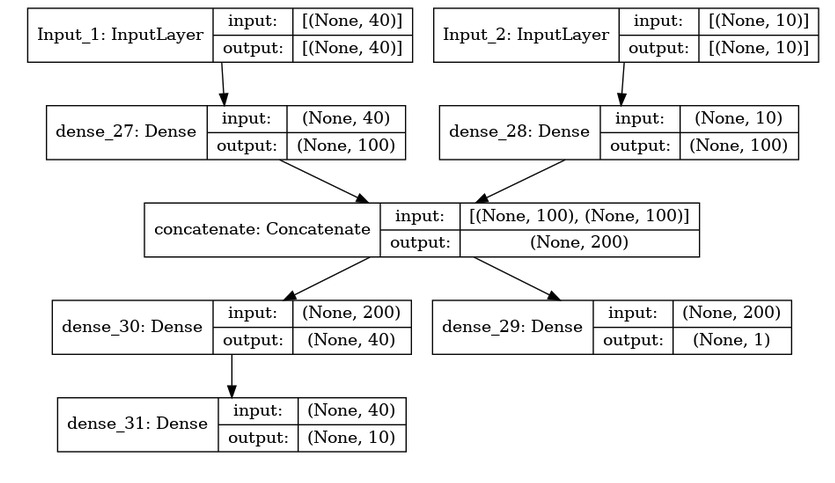

In [98]:
# 위 그림의 모델을 Functional API 방식 혹은 Subclassing API 방식으로 구현해주세요.

# [[YOUR CODE]]
# 입력
Input_1 = layers.Input(40,)
Input_2 = layers.Input(10,)


x = layers.Dense(100, activation='relu')(Input_1)
y = layers.Dense(100, activation='relu')(Input_2)

concat =layers.concatenate([x, y])

# 출력
output_x_1 = layers.Dense(40, activation='softmax', name='output_ctgr_1')(concat)
output_x_2 = layers.Dense(10, activation='softmax', name='output_ctgr_2')(concat)
output_y = layers.Dense(1, activation='sigmoid', name='output_bi')(output_x_1)


model = models.Model(inputs=[Input_1, Input_2], outputs=[output_x_2, output_y])
model.summary()

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_37 (InputLayer)          [(None, 40)]         0           []                               
                                                                                                  
 input_38 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 dense_86 (Dense)               (None, 100)          4100        ['input_37[0][0]']               
                                                                                                  
 dense_87 (Dense)               (None, 100)          1100        ['input_38[0][0]']               
                                                                                           

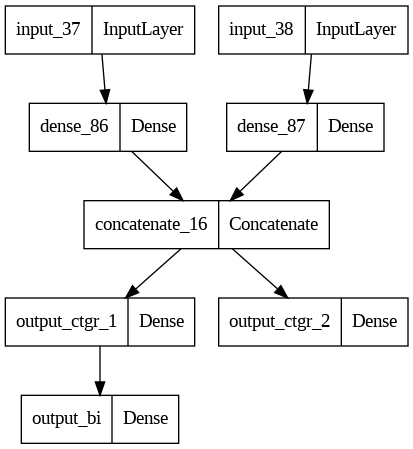

In [99]:
utils.plot_model(model)